### **Help Level Three for Milestone Deliverable Two**

__In this implementation we primarily focus performance comparison of 3 different algorithms which will be using HER to learn environment intricacies to achieve the final goal of parking the agent.__

### **Setting up the environment**

* __Installing `highway-env` & `stable-baselines`.__
* __Setting up virtual display for google colab.__
* __Importing plotting and progress measurement packages.__



In [1]:
# Package download statements.
# Note 1: This time we also use ffmpeg package for handling video recording related tasks.
# Note 2: The package version are generic and doesn't require any specific package version downloads.
!apt-get update >& /dev/null
!pip install pyvirtualdisplay >& /dev/null
!apt-get install -y xvfb python-opengl ffmpeg >& /dev/null
!pip install highway_env
# importing gym and high_env for loading different environment scenarios.
import gym
import highway_env

# Agent related import statements.
!pip install stable-baselines3
# HER: stands for Hindsight Experience Replay, in stable-baselines it is a 
# wrapper package for algorithms like TD3, SAC, DDPG etc.

# Note: HER works only on goal environment and works only gym env inherits from gym.GoalEnv.

# SAC: stands for Soft Actor Critic, This algorithm optimizes stochastic policy
# with off-policy approach. The policy is designed to maximize trade-off between
# expected rewards and entropy i.e. randomness by this algorithm.
from stable_baselines3 import HER, DQN, SAC, DDPG, TD3

# tqdm: gives progress bars to loops.
from tqdm.notebook import trange

# Plotting the comparitive graph for different agents under analysis.
import matplotlib.pyplot as plt

     |████████████████████████████████| 102kB 8.6MB/s 
     |████████████████████████████████| 11.8MB 215kB/s 
     |████████████████████████████████| 153kB 13.5MB/s 


In [17]:
# Similar, to earlier rendering procedures for creating virtual display.
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
from gym.wrappers import Monitor
from pathlib import Path
import base64

# Declaring display screen size for rendering highway-env environment.
display = Display(visible=0, size=(1366, 768))
display.start()

# These functions are also available in '/highway-env/scripts/' directory in utils.py
# file of highway-env github repository. These, can be directly accessed with below
# commands but we are using these functions here to fix a specific size of recorded videos.
# Note: commands are stated below for directly using these functions.
# Also, we have changed these functions slightly. Therefore, refer documentation.

# !git clone https://github.com/eleurent/highway-env.git
# import sys
# sys.path.insert(0, './highway-env/scripts/')
# from utils import record_videos, show_videos, capture_intermediate_frames

def wrap_env(env):
    '''
    Monitoring the environment interactions by agent and recording them in video.
    '''
    return Monitor(env, './video', force=True, video_callable=lambda episode: True)


def show_video():
    '''
    Reading the stored video and display the output inline with code cells.
    '''
    html = []
    for mp4 in Path('./video').glob("*.mp4"):
        video_b64 = base64.b64encode(mp4.read_bytes())
        html.append('''<video alt="{}" autoplay
                      loop controls style="height: 212px;">
                      <source src="data:video/mp4;base64,{}" type="video/mp4" />
                 </video>'''.format(mp4, video_b64.decode('ascii')))
    ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))


def capture_intermediate_frames(env):
    '''
    Sending rendered frames to Monitor for logging video recording of captured frame.
    '''
    env.unwrapped.automatic_rendering_callback = env.video_recorder.capture_frame

### **SAC Agent Training with HER Wrapper function**

In [3]:
env = gym.make("parking-v0")

# stable-baselines3 needs max episode length to be set. 

# SAC parses the model class of Off-Policy RL model.
# 'MlpPolicy' implements actor-critic with a MLP (2 layers of 64 nodes).
sac_model = HER('MlpPolicy', env, SAC, n_sampled_goal=4,
            goal_selection_strategy='future', max_episode_length=256,
            verbose=1, buffer_size=int(1e6),
            learning_rate=1e-3,
            gamma=0.95, batch_size=256, online_sampling=True,
            policy_kwargs=dict(net_arch=[256, 256, 256]))
# argument: total_timesteps is `passed as approximately 33k.
# It gives number of timestamps to train on.
sac_model.learn(int(18384))

Using cuda device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | -49.9    |
|    success rate    | 0        |
| time/              |          |
|    episodes        | 4        |
|    fps             | 49       |
|    time_elapsed    | 8        |
|    total timesteps | 400      |
| train/             |          |
|    actor_loss      | -2.52    |
|    critic_loss     | 0.0173   |
|    ent_coef        | 0.742    |
|    ent_coef_loss   | -1.01    |
|    learning_rate   | 0.001    |
|    n_updates       | 299      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | -54      |
|    success rate    | 0        |
| time/              |          |
|    episodes        | 8        |
|    fps             | 47       |
|    time_elapsed    | 16       |
|    total timesteps | 800      |
| train/             |        

### **SAC Agent Evaluation with Average Reward Calculation**

In [6]:
env = gym.make("parking-v0")
# Creating reward_list for storing all the rewards.
sac_rewards = []
for episode in trange(100, desc="Calculating Average Reward Values"):
    obs, done = env.reset(), False
    rewards = 0.0
    while not done:
        action, _ = sac_model.predict(obs)
        obs, reward, done, info = env.step(action)
        rewards = rewards + reward
    # Storing the reward function trend values.
    sac_rewards.append(rewards)
env.close()
# Storing the average value of rewards. 
avg_sac_rewards = (sum(sac_rewards)/100)

print(sac_rewards)
print(avg_sac_rewards)


[-18.803476450110825, -14.27416101436081, -2.5332579220487137, -7.161010526653771, -27.908616333507727, -25.533595543309715, -19.71315582070312, -14.231553797647802, -24.113637468598114, -15.477527475936864, -4.338823609648884, -11.183535756628709, -5.86773112937282, -19.43610231683943, -15.268047564989727, -18.250054385103503, -10.485544652205169, -5.599618854218144, -19.812373296734137, -16.072144735894565, -8.702146530485352, -15.566986712960395, -17.797101020823565, -22.717130604335054, -22.473118533799575, -22.832797334321576, -23.14916764636857, -20.12318516774067, -4.79856999435463, -28.018197018279018, -3.1891009292730996, -11.63928353848135, -16.869460174974805, -9.53455327305697, -22.851058369729813, -26.102138185144938, -3.2213074230615795, -9.073237889923547, -17.59568549345577, -8.758094617337425, -29.382628154214117, -21.78739056884634, -16.258282931810776, -20.718630496341184, -3.7334116452687516, -28.701398412208746, -13.374249071788396, -12.907583843108458, -6.7384749

### **DDPG Agent Training with HER Wrapper function**

In [9]:
env = gym.make("parking-v0")
ddpg_model = HER('MlpPolicy', env, DDPG, n_sampled_goal=4,
            goal_selection_strategy='future', max_episode_length=256,
            verbose=1, buffer_size=int(1e6),
            gamma=0.9, batch_size=256, online_sampling=True,
            policy_kwargs=dict(net_arch=[256, 256, 256]))
ddpg_model.learn(18384)

Using cuda device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | -71.5    |
|    success rate    | 0        |
| time/              |          |
|    episodes        | 4        |
|    fps             | 73       |
|    time_elapsed    | 5        |
|    total timesteps | 400      |
| train/             |          |
|    actor_loss      | 0.624    |
|    critic_loss     | 0.0526   |
|    learning_rate   | 0.001    |
|    n_updates       | 200      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | -77      |
|    success rate    | 0        |
| time/              |          |
|    episodes        | 8        |
|    fps             | 63       |
|    time_elapsed    | 12       |
|    total timesteps | 800      |
| train/             |          |
|    actor_loss      | 1.59     |
|    critic_loss     | 0.015  

### **DDPG Agent Evaluation with Average Reward Calculation**

In [10]:
env = gym.make("parking-v0")
ddpg_rewards = []
for episode in trange(100, desc="Calculating Average Reward Values"):
    obs, done = env.reset(), False
    rewards = 0.0
    while not done:
        action, _ = ddpg_model.predict(obs)
        obs, reward, done, info = env.step(action)
        rewards = rewards + reward
    # Storing the reward function trend values.
    ddpg_rewards.append(rewards)
env.close()
# Storing the average value of rewards. 
avg_ddpg_rewards = (sum(ddpg_rewards)/100)

print(ddpg_rewards)
print(avg_ddpg_rewards)


[-33.371270635788484, -28.627477240354498, -33.57556799696001, -28.570149525828377, -29.44365433474391, -36.775201816993544, -23.649100297002757, -40.24133318577821, -37.02012364982858, -20.413606335029524, -38.415457494185745, -33.98094716247925, -21.152880632742644, -23.300623463488098, -30.329610143473893, -27.043052003098605, -27.004256164370457, -31.705796415579936, -2.93026590832249, -32.95488594440013, -14.948403636833783, -25.58191506523084, -32.192764806596564, -24.806325957399707, -31.6994176458742, -38.901043423193116, -32.857433927967946, -6.00474094082457, -3.8526780431380176, -33.24464728911869, -27.56115931807514, -31.761640027862978, -27.360140312067323, -27.35670723285674, -4.136200738585415, -28.202831666410027, -9.503213448183605, -34.512759964521806, -28.046931229864004, -23.90713736735955, -6.230957971361098, -19.72529739426374, -24.27984898621207, -21.32774044437222, -30.758767368046833, -38.278548254595584, -27.87233828589077, -26.744603755781622, -37.5380194162

### **TD3 Agent Training with HER Wrapper function**

In [11]:
env = gym.make("parking-v0")
td3_model = HER('MlpPolicy', env, TD3, n_sampled_goal=4,
            goal_selection_strategy='future', max_episode_length=256,
            verbose=1, buffer_size=int(1e6),
            gamma=0.9, batch_size=256, online_sampling=True,
            policy_kwargs=dict(net_arch=[256, 256, 256]))
td3_model.learn(18384)

Using cuda device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | -46.7    |
|    success rate    | 0        |
| time/              |          |
|    episodes        | 4        |
|    fps             | 76       |
|    time_elapsed    | 5        |
|    total timesteps | 400      |
| train/             |          |
|    actor_loss      | 0.427    |
|    critic_loss     | 0.07     |
|    learning_rate   | 0.001    |
|    n_updates       | 200      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | -47.2    |
|    success rate    | 0        |
| time/              |          |
|    episodes        | 8        |
|    fps             | 65       |
|    time_elapsed    | 12       |
|    total timesteps | 800      |
| train/             |          |
|    actor_loss      | 0.679    |
|    critic_loss     | 0.00448

### **TD3 Agent Evaluation with Average Reward Calculation**

In [12]:
env = gym.make("parking-v0")
td3_rewards = []
for episode in trange(100, desc="Calculating Average Reward Values"):
    obs, done = env.reset(), False
    rewards = 0.0
    while not done:
        action, _ = td3_model.predict(obs)
        obs, reward, done, info = env.step(action)
        rewards = rewards + reward
    # Storing the reward function trend values.
    td3_rewards.append(rewards)
env.close()
# Storing the average value of rewards.
avg_td3_rewards = (sum(td3_rewards)/100)

print(td3_rewards)
print(avg_td3_rewards)


[-32.425701503535, -43.57199278865467, -46.48408330038697, -54.867066058522255, -52.12309011177273, -39.750711920488584, -59.52672611610198, -42.4067745977594, -50.92623766366205, -48.98634411864738, -50.91335307604881, -57.82573626045819, -44.0835824657033, -41.54371148278282, -62.740399614352604, -38.51017849808627, -42.206577319344184, -39.78667927820466, -47.45120456503735, -35.08704804345566, -30.62409998054257, -38.54188648125302, -65.93056621380121, -52.22559526947573, -47.05181993354383, -62.688459374483145, -40.837367390182116, -57.07371223022056, -39.291188069696105, -34.281960278241115, -31.393635342903977, -48.33868508424417, -38.54060601175371, -46.83255583293039, -53.41176657681239, -45.94545251984394, -45.541388557685366, -34.938961253221755, -58.225591639386536, -47.53574998296166, -59.69737326989652, -54.58636795416645, -48.26357964709439, -61.40985233481187, -38.873550094435856, -31.719629026606935, -36.79839208728197, -59.50010778949651, -42.64585208944654, -53.7532

### **Plotting the reward values for all the agents trained**

In [13]:
 # Declaration of variables for graph creation.
 lower = 0
 upper = 100
 length = 100
 num_len = [lower + x*(upper-lower)/length for x in range(length)]
 print(num_len)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0]


In [14]:
# Average plot line creation for graph population.
from itertools import repeat
avg_td3_rewards_list = []
avg_sac_rewards_list = []
avg_ddpg_rewards_list = []

avg_td3_rewards_list.extend(repeat(avg_td3_rewards, 100)) 
avg_ddpg_rewards_list.extend(repeat(avg_ddpg_rewards, 100)) 
avg_sac_rewards_list.extend(repeat(avg_sac_rewards, 100)) 

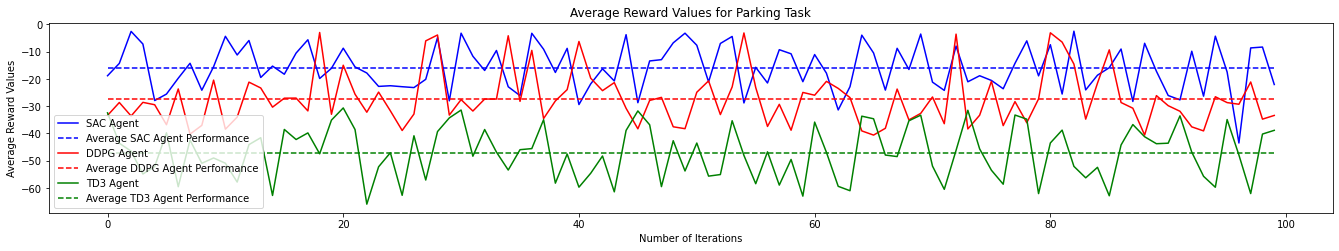

In [24]:
# Plotting the reward results after model training.
plt.figure(figsize=(23,3.5))

plt.plot(num_len, sac_rewards, label='SAC Agent', color="blue")
plt.plot(num_len, avg_sac_rewards_list, '--', label='Average SAC Agent Performance', color="blue")
plt.plot(num_len, ddpg_rewards, label='DDPG Agent', color="red")
plt.plot(num_len, avg_ddpg_rewards_list, '--', label='Average DDPG Agent Performance', color="red")
plt.plot(num_len, td3_rewards, label='TD3 Agent', color="green")
plt.plot(num_len, avg_td3_rewards_list, '--', label='Average TD3 Agent Performance', color="green")

plt.xlabel('Number of Iterations')
plt.ylabel('Average Reward Values')
plt.title('Average Reward Values for Parking Task')
plt.legend()

plt.show()

### **Displaying the video outputs of the problem and downloading them**

In [18]:
env = wrap_env(gym.make("parking-v0"))
# Running sample 5 episodes for video output.
for episode in trange(5, desc="Output Episodes for SAC Agent"):
    # capture_intermediate_frames is inside the loop
    # with this we can capture multiple iterations of goal completion
    # into our Monitor instance.
    obs, done = env.reset(), False
    capture_intermediate_frames

    while not done:
        action, _ = sac_model.predict(obs)
        obs, reward, done, info = env.step(action)

env.close()

show_video()

In [ ]:
# Zipping the video folder for the given SARSA agent.
!zip -r /content/file.zip /content/video
# Downloading the file resource.
from google.colab import files
files.download("/content/file.zip")
!rm -r video/

  adding: content/video/ (stored 0%)
  adding: content/video/openaigym.video.3.100.video000003.meta.json (deflated 60%)
  adding: content/video/openaigym.video.3.100.video000000.mp4 (deflated 6%)
  adding: content/video/openaigym.video.3.100.video000002.meta.json (deflated 60%)
  adding: content/video/openaigym.video.3.100.video000006.meta.json (deflated 60%)
  adding: content/video/openaigym.video.3.100.video000007.mp4 (deflated 18%)
  adding: content/video/openaigym.video.3.100.video000000.meta.json (deflated 60%)
  adding: content/video/openaigym.video.3.100.video000007.meta.json (deflated 60%)
  adding: content/video/openaigym.video.3.100.video000008.meta.json (deflated 60%)
  adding: content/video/openaigym.video.3.100.video000004.meta.json (deflated 60%)
  adding: content/video/openaigym.video.3.100.video000004.mp4 (deflated 6%)
  adding: content/video/openaigym.video.3.100.video000001.meta.json (deflated 60%)
  adding: content/video/openaigym.video.3.100.video000002.mp4 (deflate

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
env = wrap_env(gym.make("parking-v0"))
# Running sample 5 episodes for video output.
for episode in trange(5, desc="Output Episodes for DDPG Agent"):
    # capture_intermediate_frames is inside the loop
    # with this we can capture multiple iterations of goal completion
    # into our Monitor instance.
    obs, done = env.reset(), False
    capture_intermediate_frames

    while not done:
        action, _ = ddpg_model.predict(obs)
        obs, reward, done, info = env.step(action)

env.close()

show_video()

In [ ]:
# Zipping the video folder for the given SARSA agent.
!zip -r /content/file.zip /content/video
# Downloading the file resource.
from google.colab import files
files.download("/content/file.zip")
!rm -r video/

In [20]:
env = wrap_env(gym.make("parking-v0"))
# Running sample 5 episodes for video output.
for episode in trange(5, desc="Output Episodes for TD3 Agent"):
    # capture_intermediate_frames is inside the loop
    # with this we can capture multiple iterations of goal completion
    # into our Monitor instance.
    obs, done = env.reset(), False
    capture_intermediate_frames

    while not done:
        action, _ = td3_model.predict(obs)
        obs, reward, done, info = env.step(action)

env.close()

show_video()

In [ ]:
# Zipping the video folder for the given SARSA agent.
!zip -r /content/file.zip /content/video
# Downloading the file resource.
from google.colab import files
files.download("/content/file.zip")
!rm -r video/

__Note: All the models are not trained extensively for this experiment to observe the performance of each RL algorithm in an intermediate state. As a learner you can tune the timestamp & other hyperparameters to achieve an optimum performance for our trained agents.__